In this notebook, we want to summarize the data and make sure that it is behaving as we expect based on previous literature. Here, we want to only use the outcome for tumor_cell_evaluation

Tumor score is defined by UCSF pathologists in the following way: <br>

0: neuropil without tumor <br>
1: infiltrating tumor margin containing a detectable but not abundant number of tumor cells <br>
2: more cellular infiltrated zone <br>
3: highly cellular tumor <br>

In [65]:
recgli = read.csv("../../ParseData/8thParse_researchPath_withInVivo.csv") 

#### In this notebook, we want to find: <br>
1. Anatomical params vs. TS using <br>
    a. No separation into ROIs <br>
    b. Visual comparison of anatomical params in separate regions <br>
    ~~c. Repeated Measures ANOVA (analysis of variance) to account for multiple samples from the same patient to see if there is true separation among tumor scores for anatomical parameters~~ <b> you can't use RMANOVA for categorical data </b> (sources: http://sherifsoliman.com/2014/12/10/ANOVA_in_R/, https://www.r-bloggers.com/two-way-anova-with-repeated-measures/, https://www.r-statistics.com/tag/ezanova/) <br> 
    c. Use GLMM associate anatomical parameters with TS, no separation <br>
    d. Use GEE to associate anatomical parameters with TS, no separation <br>
    e. Use GLMM to associate anatomical parameters with TS, separating into CEL & NEL <br>
    f. Use GEE to associate anatomical parameters with TS, separating into CEL & NEL <br>
2. Diffu params vs. TS<br>
3. Perf params vs. TS<br>
4. Spec params vs. TS<br>


## 0. Prep the data

In [66]:
colnames(recgli)

[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "spec_quant"                "include_anat"             
[53] "include_diffu1000"         "include_diffu2000"        
[55] "include_diffu_all"         "include_perf"             
[57] "include_spec"              "include_one_advanced_mod" 
[59] "include_all_advanced_mods" "X.CEL"                    
[61] "X.NEL"                     "X.NEC"                    
[63] "sum"                       "in_CEL"                   
[65] "in_T2all"                  "in_NEL"                   
[67] "in_NEC"                    "in_ROI"                   
[69] "desired_hist"              "multnom_out"              
[71] "no_ffpe"                   "waiting_on_path"          
[73] "rhgg_txe_analysis"

The first thing we have to do is actually take away those that were "indeterminable" when tumor score was evaluated by the pathologist: 

In [67]:
table(recgli$tumor_cell_evaluation)


  0   1   2   3 Ind 
 90  54 117 122   8 

In [68]:
recgli = recgli[recgli$tumor_cell_evaluation != "Ind",]
dim(recgli)
recgli = droplevels(recgli)
recgli$tumor_cell_evaluation = as.character(recgli$tumor_cell_evaluation)
recgli$tumor_cell_evaluation = as.numeric(recgli$tumor_cell_evaluation)
str(recgli$tumor_cell_evaluation)

[1] 383  73

 num [1:383] 0 2 2 2 0 1 0 2 1 0 ...


In [75]:
recgli.anat = recgli[recgli$include_anat==1,]
dim(recgli.anat)

[1] 383  73

## 1. Anatomical vs. TS 

### a. No separation into ROIs

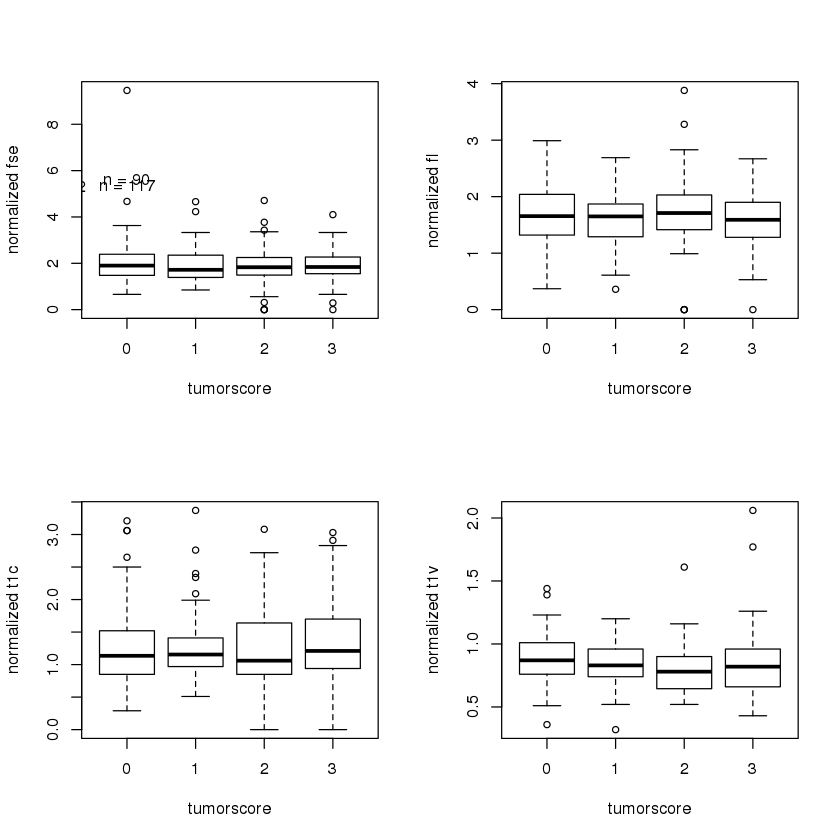

In [69]:
par(mfrow = c(2, 2))
a = boxplot(nfse ~ tumor_cell_evaluation , data = recgli, ylab = "normalized fse", xlab = "tumorscore")
text( c(1:nlevels(recgli$tumor_cell_evaluation)) , a$stats[nrow(a$stats) , ]+2 , paste("n = ",table(recgli$tumor_cell_evaluation),sep="")  )
boxplot(nfl ~ tumor_cell_evaluation , data = recgli, ylab = "normalized fl", xlab = "tumorscore")
boxplot(nt1c ~ tumor_cell_evaluation , data = recgli, ylab = "normalized t1c", xlab = "tumorscore")
boxplot(nt1v ~ tumor_cell_evaluation , data = recgli, ylab = "normalized t1v", xlab = "tumorscore")

### b. CEL next to NEL scores  

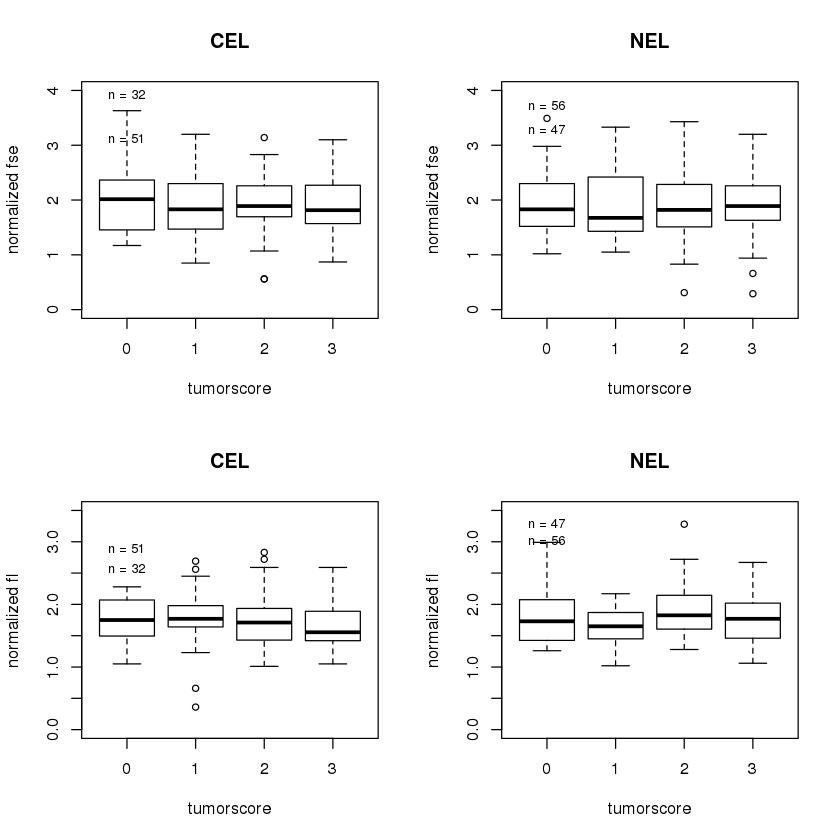

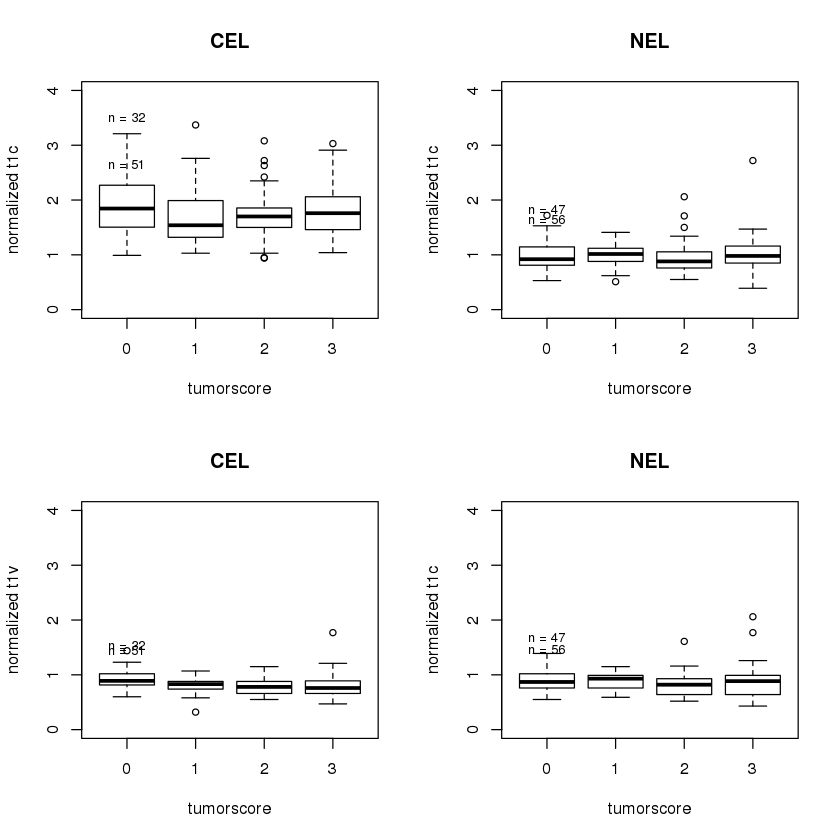

In [70]:
par(mfrow = c(2, 2))
a = boxplot(nfse ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized fse", xlab = "tumorscore", main = "CEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation)) , a$stats[nrow(a$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
b = boxplot(nfse ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized fse", xlab = "tumorscore", main = "NEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation)) , b$stats[nrow(b$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)

c = boxplot(nfl ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized fl", xlab = "tumorscore", main = "CEL", ylim = c(0,3.5))
text( c(1:nlevels(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation)) , c$stats[nrow(c$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
d = boxplot(nfl ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized fl", xlab = "tumorscore", main = "NEL", ylim = c(0,3.5))
text( c(1:nlevels(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation)) , d$stats[nrow(d$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)

e = boxplot(nt1c ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized t1c", xlab = "tumorscore", main = "CEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation)) , e$stats[nrow(e$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
f = boxplot(nt1c ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized t1c", xlab = "tumorscore", main = "NEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation)) , f$stats[nrow(f$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)

g = boxplot(nt1v ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized t1v", xlab = "tumorscore", main = "CEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation)) , g$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
h = boxplot(nt1v ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized t1c", xlab = "tumorscore", main = "NEL", ylim = c(0,4))
text( c(1:nlevels(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation)) , h$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)


### c. Use GLMM associate anatomical parameters with TS, no separation 


FALSE 
  383 

 num [1:383] 2.1 2.27 2.35 2.2 2.07 0.85 2.42 1.08 4.23 3.34 ...


In [85]:
=


FALSE 
  383 


FALSE 
  383 

Warning message:
“Converting "t_number" to factor for ANOVA.”Warning message:
“"nfse" will be treated as numeric.”Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”

ERROR: Error in ezANOVA_main(data = data, dv = dv, wid = wid, within = within, : One or more cells is missing data. Try using ezDesign() to check your data.


In [84]:
nfse_anova

ERROR: Error in eval(expr, envir, enclos): object 'nfse_anova' not found
